# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.


In [1]:
# ! pip install names
# ! pip install faker

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from names import get_full_name
from sklearn.impute import SimpleImputer
from scipy.stats import zscore 
from scipy.stats import boxcox

In [3]:
#? Name|Roll NO|Division|Branch
totalNumStudent=100
rollNo=np.arange(1,totalNumStudent+1)
print(rollNo)
marks=np.random.randint(35,100,size=totalNumStudent)
print(marks)
totalHrStudy=np.random.randint(1,10,size=totalNumStudent)
print(totalHrStudy)
studNames=[get_full_name()for _ in range(totalNumStudent)]
print(studNames)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[73 36 85 39 38 57 43 78 69 83 56 66 76 87 78 37 82 46 89 68 72 64 62 64
 38 68 83 57 36 97 56 91 60 48 90 62 37 55 72 84 95 47 65 86 63 81 57 46
 71 90 95 55 73 76 91 37 61 77 97 39 85 57 79 71 41 45 65 65 92 80 77 82
 77 48 87 41 71 94 64 66 39 38 69 66 78 94 74 48 70 59 84 51 70 82 58 76
 61 85 46 90]
[5 8 2 9 8 9 7 5 5 2 2 1 5 3 2 3 5 1 3 2 3 5 2 4 5 1 3 3 6 9 1 8 5 4 4 2 2
 3 7 4 2 5 7 1 4 3 7 1 1 3 1 2 1 3 5 1 6 3 8 4 6 7 9 8 9 6 3 9 7 4 9 8 6 3
 8 5 6 8 7 4 7 4 5 9 4 7 3 1 5 7 2 6 3 5 4 6 5 3 2 2]
['Larry Jones', 'Yvonne Parker', 'Daniel Mclain', 'Steven Shelpman', 'Kerry Steedle

In [4]:
data={
        "ROLL_NO":rollNo,
        "NAME":studNames,
        "MARKS":marks,
        "TOTAL_HR_STUDY":totalHrStudy
    }
df=pd.DataFrame(data)
df

,ROLL_NO,NAME,MARKS,TOTAL_HR_STUDY
0,1,Larry Jones,73,5
1,2,Yvonne Parker,36,8
2,3,Daniel Mclain,85,2
3,4,Steven Shelpman,39,9
4,5,Kerry Steedley,38,8
...,...,...,...,...
95,96,Teresa Watt,76,6
96,97,Brandy Santiago,61,5
97,98,Christine Fain,85,3
98,99,Rachel Towe,46,2


In [5]:
df.isna().sum()
# np.isnan(df).sum()
df.isnull().sum()

ROLL_NO           0
NAME              0
MARKS             0
TOTAL_HR_STUDY    0
dtype: int64

In [6]:
df.describe()

,ROLL_NO,MARKS,TOTAL_HR_STUDY
count,100.000000,100.000000,100.000000
mean,50.500000,67.090000,4.580000
std,29.011492,17.554587,2.458463
min,1.000000,36.000000,1.000000
25%,25.750000,55.750000,3.000000
50%,50.500000,68.500000,4.000000
75%,75.250000,82.000000,7.000000
max,100.000000,97.000000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ROLL_NO         100 non-null    int32 
 1   NAME            100 non-null    object
 2   MARKS           100 non-null    int32 
 3   TOTAL_HR_STUDY  100 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 2.1+ KB


In [8]:
df['NAME'].nunique()

100

In [9]:
df['NAME']

0         Larry Jones
1       Yvonne Parker
2       Daniel Mclain
3     Steven Shelpman
4      Kerry Steedley
           ...       
95        Teresa Watt
96    Brandy Santiago
97     Christine Fain
98        Rachel Towe
99          John Hunt
Name: NAME, Length: 100, dtype: object

In [10]:
imputer=SimpleImputer(strategy='mean')

In [11]:
df['MARKS_NO_NAN_IMPUTE']=imputer.fit_transform(df[['MARKS']])

In [12]:
df['MARKS_NO_NAN_INTER']=df['MARKS'].interpolate()

In [13]:

df['MARKS'].replace(77,0,inplace=True)
df['MARKS'].sort_values()

72     0
70     0
57     0
28    36
1     36
      ..
85    94
50    95
40    95
58    97
29    97
Name: MARKS, Length: 100, dtype: int32

In [14]:
# from faker import Faker
# fake=Faker('en_IN')
# nameList=[fake.name() for _ in range(100)]

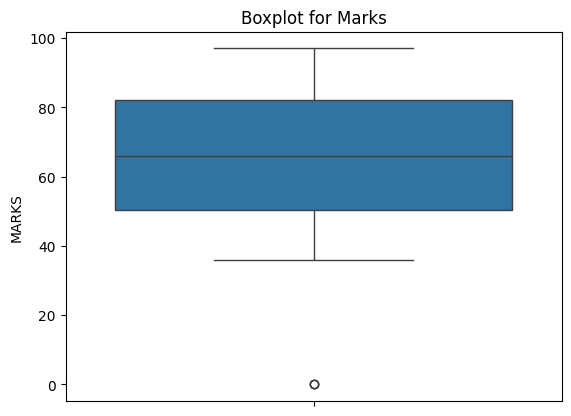

In [15]:
sns.boxplot(data=df['MARKS'])
plt.title("Boxplot for Marks")
plt.show()

Text(0.5, 0, 'Marks Obtained')

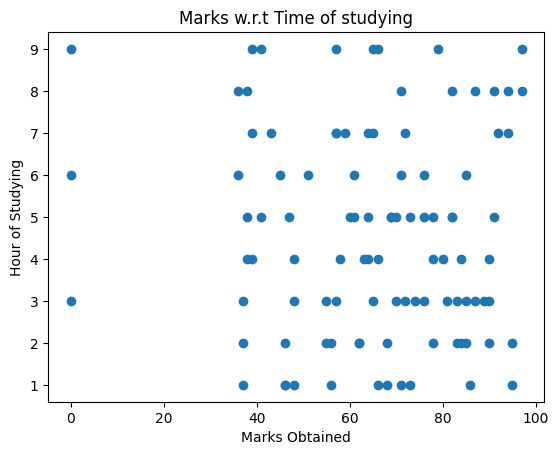

In [16]:
plt.scatter(df['MARKS'],df['TOTAL_HR_STUDY'])
plt.title("Marks w.r.t Time of studying")
plt.ylabel("Hour of Studying")
plt.xlabel('Marks Obtained')

In [17]:
z_scores=np.abs(zscore(df['MARKS']))
threshold=3
outliers=df[z_scores>threshold]
outliers

,ROLL_NO,NAME,MARKS,TOTAL_HR_STUDY,MARKS_NO_NAN_IMPUTE,MARKS_NO_NAN_INTER
57,58,Marion Derossett,0,3,77.0,77
70,71,Pauline Young,0,9,77.0,77
72,73,Willie Dalton,0,6,77.0,77


In [18]:
df['MARKS']=np.where(z_scores>threshold,np.nan,df['MARKS'])

In [19]:
df.isna().sum()

ROLL_NO                0
NAME                   0
MARKS                  3
TOTAL_HR_STUDY         0
MARKS_NO_NAN_IMPUTE    0
MARKS_NO_NAN_INTER     0
dtype: int64

In [20]:
df=df.interpolate()
df.isna().sum()


C:\Users\shivt\AppData\Local\Temp\ipykernel_16084\2200883011.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df=df.interpolate()


ROLL_NO                0
NAME                   0
MARKS                  0
TOTAL_HR_STUDY         0
MARKS_NO_NAN_IMPUTE    0
MARKS_NO_NAN_INTER     0
dtype: int64

In [21]:
df['MARKS_T'],_=boxcox(df['MARKS'])

In [22]:
df

,ROLL_NO,NAME,MARKS,TOTAL_HR_STUDY,MARKS_NO_NAN_IMPUTE,MARKS_NO_NAN_INTER,MARKS_T
0,1,Larry Jones,73.0,5,73.0,73,127.733145
1,2,Yvonne Parker,36.0,8,36.0,36,55.448814
2,3,Daniel Mclain,85.0,2,85.0,85,152.753192
3,4,Steven Shelpman,39.0,9,39.0,39,60.967609
4,5,Kerry Steedley,38.0,8,38.0,38,59.119788
...,...,...,...,...,...,...,...
95,96,Teresa Watt,76.0,6,76.0,76,133.927535
96,97,Brandy Santiago,61.0,5,61.0,61,103.398179
97,98,Christine Fain,85.0,3,85.0,85,152.753192
98,99,Rachel Towe,46.0,2,46.0,46,74.117161


In [24]:
df['MARKS_T'].sort_values()

1      55.448814
28     55.448814
55     57.280129
36     57.280129
15     57.280129
         ...    
85    171.917697
50    174.066770
40    174.066770
58    178.376308
29    178.376308
Name: MARKS_T, Length: 100, dtype: float64